In [2]:
import numpy as np
import pandas as pd

In [3]:
#Import visualization libraries and set %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read in the csv file as a dataframe called df
df= pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
# unique title codes
df['title'].nunique(5)

110

In [10]:
x=df['title'].iloc[0]

In [11]:
#Unique titles
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [12]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [13]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [15]:
#most common Reason for a 911
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot: xlabel='Reason', ylabel='count'>

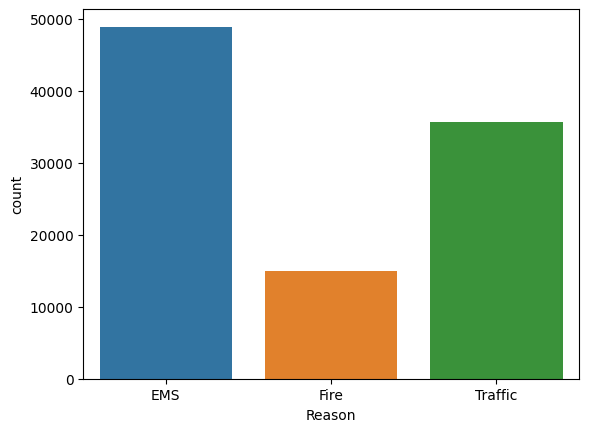

In [16]:
sns.countplot(x=df['Reason'],data=df)

In [17]:
type(df['timeStamp'][0])
#type(df['timeStamp'].iloc[0])

str

In [18]:
date=pd.to_datetime(df['timeStamp'])
date

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [19]:
date[0].hour

17

In [20]:
#adding new columns for hour,month and Day of week
df['Hour']=date.apply(lambda x: x.hour)
df['Month']=date.apply(lambda x: x.month)
df['DayOfWeek']=date.apply(lambda x: x.dayofweek)

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

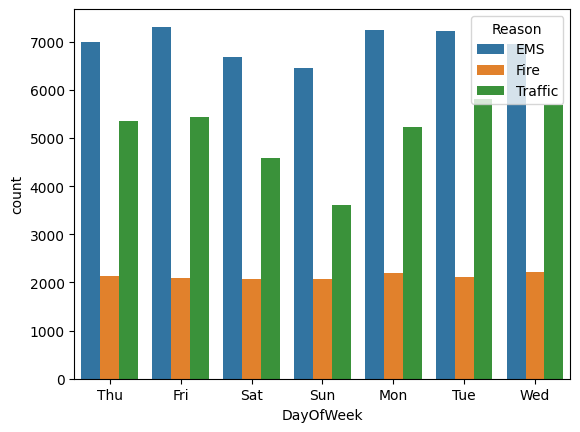

In [23]:
#countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x=df['DayOfWeek'], data=df,hue='Reason')

<AxesSubplot: xlabel='Month', ylabel='count'>

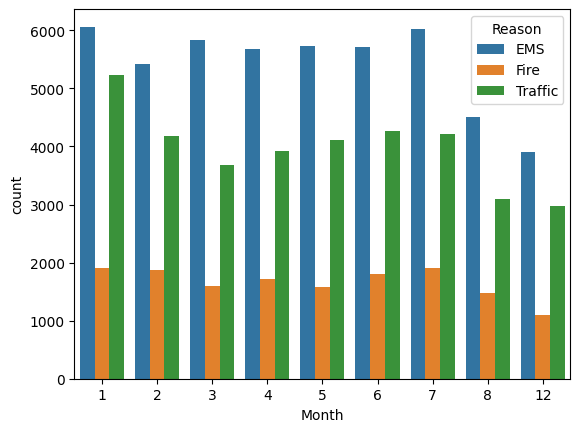

In [24]:
#countplot of the Month column with the hue based off of the Reason column
sns.countplot(x=df['Month'], data=df,hue='Reason')

In [25]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


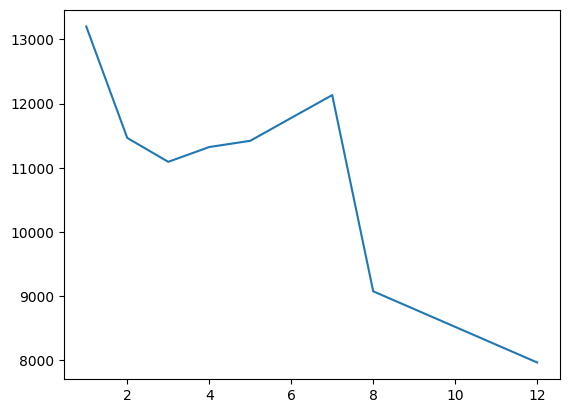

In [26]:
#plot of the dataframe indicating the count of calls per month.
plt.plot(byMonth['twp'])

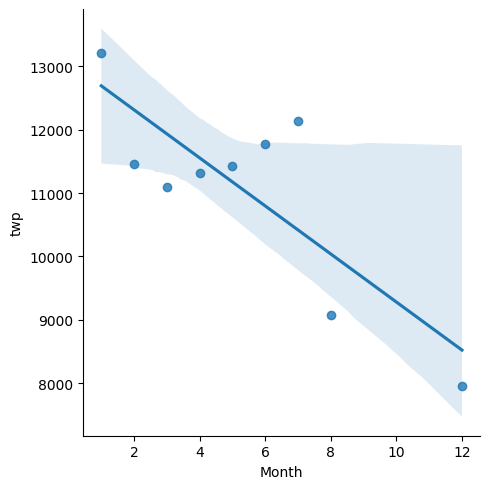

In [27]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [28]:
#Create a new column called 'Date' 
df['Date']=date.apply(lambda x:x.date())

In [29]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

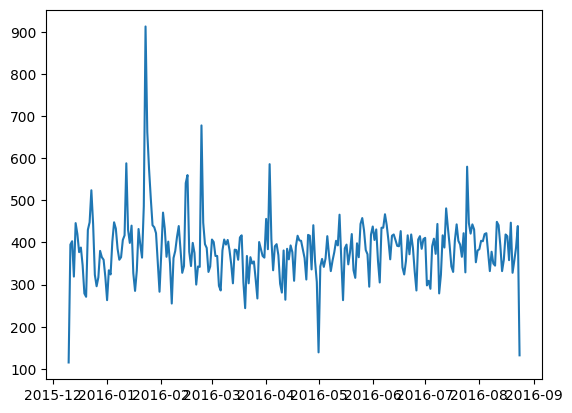

In [30]:
#groupby this Date column with the count() aggregate and create a plot of counts of 911 calls
plt.plot(byDate['twp'])

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<AxesSubplot: xlabel='Date'>

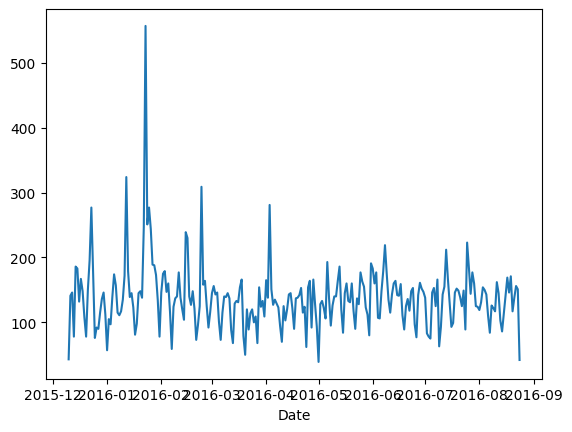

In [31]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

<AxesSubplot: xlabel='Date'>

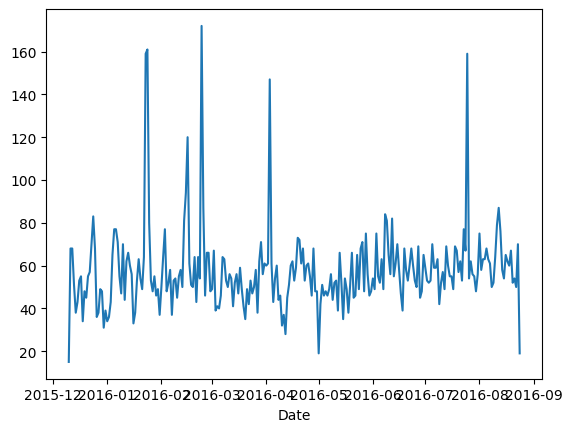

In [32]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

<AxesSubplot: xlabel='Date'>

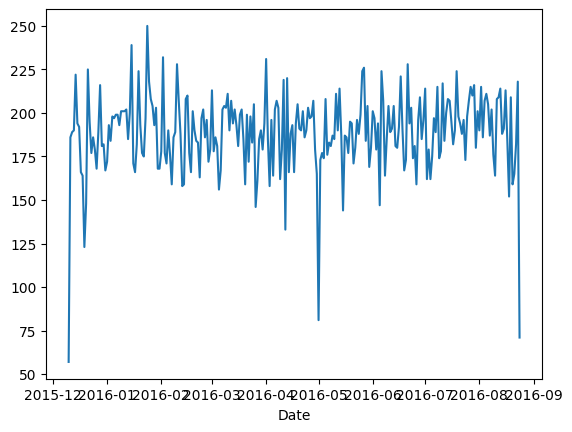

In [33]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [36]:
dayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot: xlabel='Hour', ylabel='DayOfWeek'>

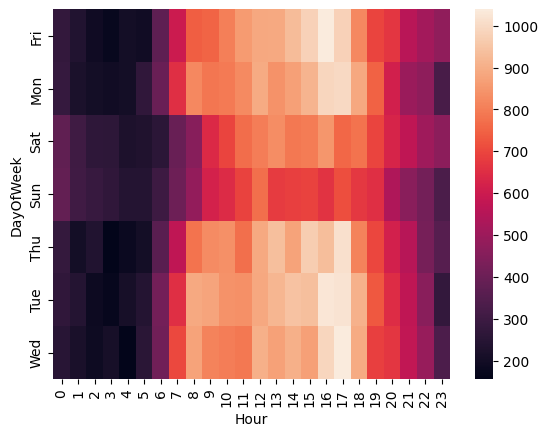

In [37]:
sns.heatmap(dayHour)

** Now create a clustermap using this DataFrame. **

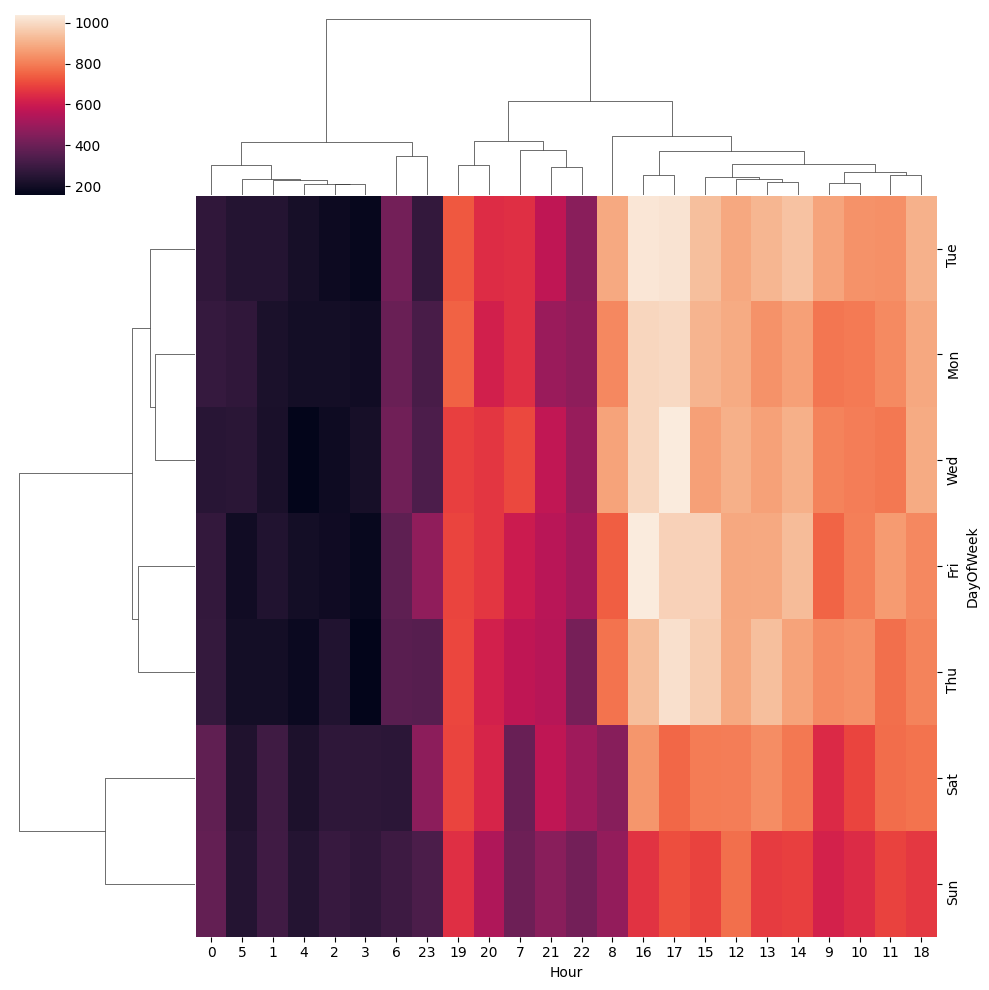

In [38]:
sns.clustermap(dayHour)

In [39]:
month = df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
month.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot: xlabel='Month', ylabel='DayOfWeek'>

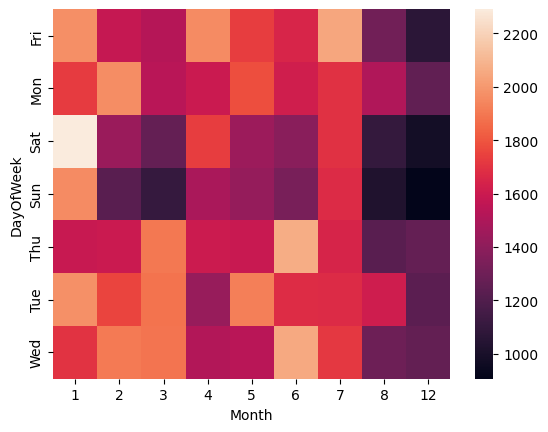

In [40]:
sns.heatmap(month)

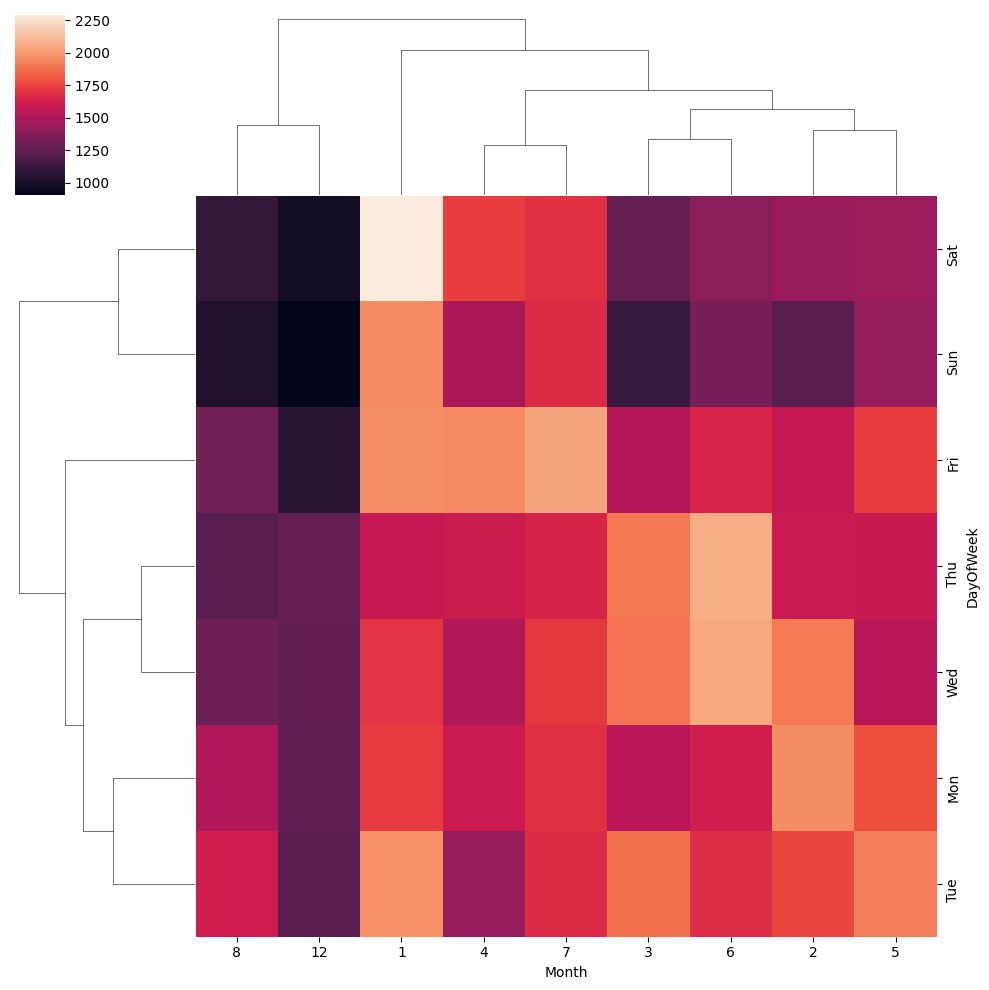

In [41]:
sns.clustermap(month)